- Experimenting with `get_frenet_relative_position`, defined within
`AutomotiveDrivingModels/src/2d/vehicles/scenes.jl`
- Will be required to provide vehicle states to Zach's ego vehicle
- Written using the tutorials available within AutoViz
- The roadway generation functions are defined in
`AutomotiveDrivingModels/src/2d/roadway/roadway_generation.jl`
- `roadways.jl` in the same folder defines a lot of useful function
    - build roadway from dxf
    - build the roadway

In [1]:
using AutomotiveDrivingModels

INFO: Recompiling stale cache file /home/raunak/.julia/lib/v0.6/AutomotiveDrivingModels.ji for module AutomotiveDrivingModels.


In [2]:
using AutoViz

INFO: Recompiling stale cache file /home/raunak/.julia/lib/v0.6/AutoViz.ji for module AutoViz.


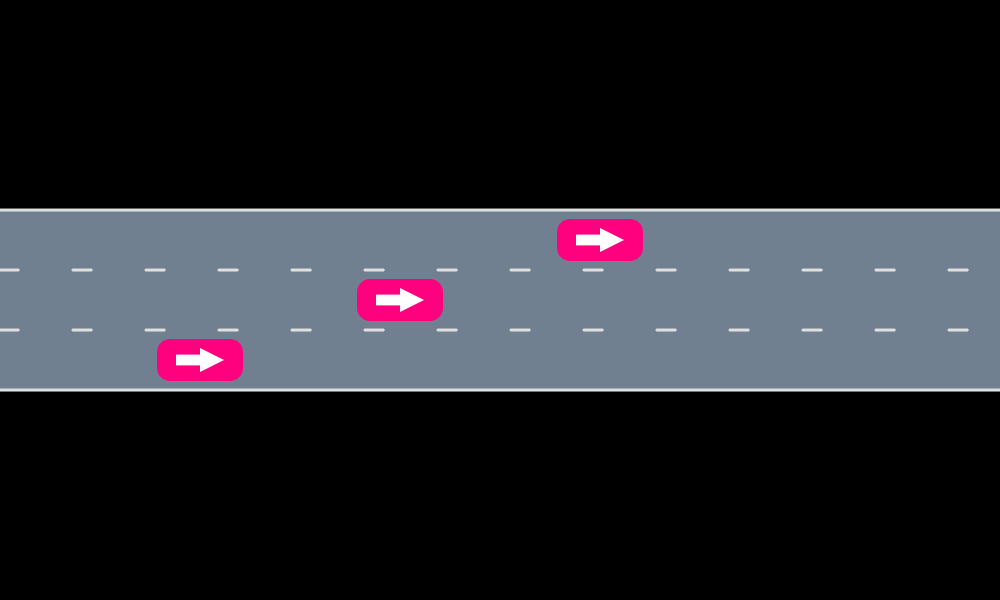

In [20]:
roadway = gen_straight_roadway(3, 50.0) # 2 lanes 50m
scene = Scene()
state1 = VehicleState(Frenet(roadway[LaneTag(1,1)],10.0), roadway, 10.0)
veh1 = Vehicle(state1, VehicleDef(), 1)
state2 = VehicleState(Frenet(roadway[LaneTag(1,2)],20.0), roadway, 10.0)
veh2 = Vehicle(state2, VehicleDef(), 2)
state3 = VehicleState(Frenet(roadway[LaneTag(1,3)],30.0), roadway, 10.0)
veh3 = Vehicle(state3, VehicleDef(), 3)
push!(scene, veh1)
push!(scene, veh2)
push!(scene, veh3)
render(scene, roadway, cam=FitToContentCamera(0.))

In [33]:
fre = get_frenet_relative_position(veh3.state.posG,veh1.state.posF.roadind,roadway)

AutomotiveDrivingModels.FrenetRelativePosition(RoadIndex({1, 0.200000}, {1, 1}), RoadIndex({1, 0.600000}, {1, 1}), 20.000000000000007, 6.0, 0.0)

In [46]:
fre.Δs

20.000000000000007

# Stadium Roadway

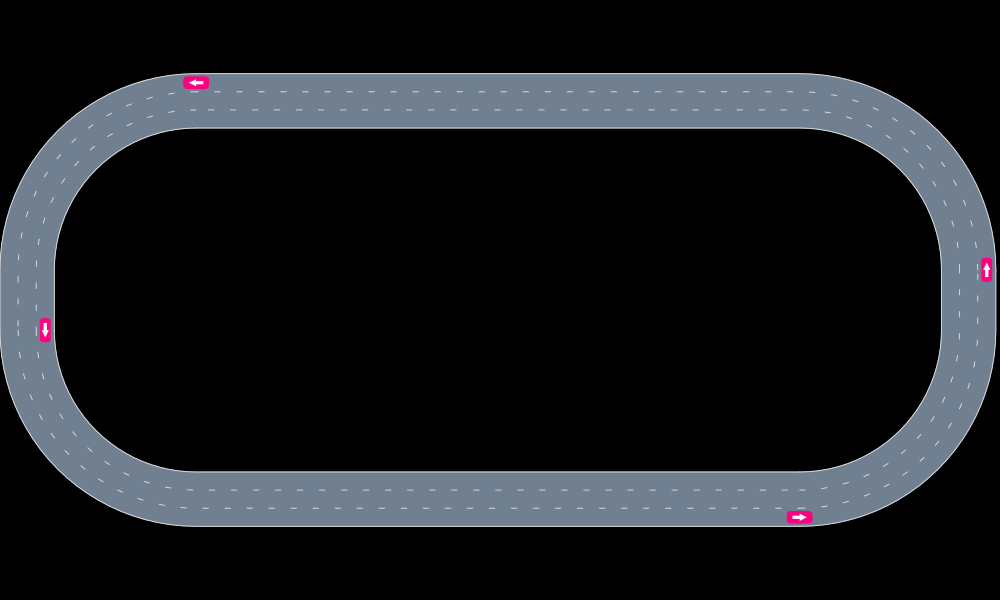

In [99]:
roadway = gen_stadium_roadway(3)
scene = Scene()
state1 = VehicleState(Frenet(roadway[LaneTag(1,1)],0.0), roadway, 10.0)
veh1 = Vehicle(state1, VehicleDef(), 1)
state2 = VehicleState(Frenet(roadway[LaneTag(2,1)],0.0), roadway, 10.0)
veh2 = Vehicle(state2, VehicleDef(), 2)
state3 = VehicleState(Frenet(roadway[LaneTag(3,1)],0.0), roadway, 10.0)
veh3 = Vehicle(state3, VehicleDef(), 3)
state4 = VehicleState(Frenet(roadway[LaneTag(4,3)],0.0), roadway, 10.0)
veh4 = Vehicle(state4, VehicleDef(), 3)
push!(scene, veh1)
push!(scene, veh2)
push!(scene, veh3)
push!(scene, veh4)
render(scene, roadway, cam=FitToContentCamera(0.))

## Detective on roadway elements
- Trying to find where the length of a segment is stored
- Inspired by: why is there a gap between new end of segment 1 and start of segment 2

In [102]:
fieldnames(roadway.segments[1])
length(roadway.segments)

4

In [111]:
typeof(roadway.segments[1])
fieldnames(roadway.segments[1])

2-element Array{Symbol,1}:
 :id   
 :lanes

In [119]:
@show typeof(roadway.segments[1].lanes[1])
fieldnames(roadway.segments[1].lanes[1])

typeof(roadway.segments[1].lanes[1]) = AutomotiveDrivingModels.Lane


8-element Array{Symbol,1}:
 :tag           
 :curve         
 :width         
 :speed_limit   
 :boundary_left 
 :boundary_right
 :exits         
 :entrances     

In [116]:
typeof(roadway.segments[1].lanes[1].tag)
fieldnames(roadway.segments[1].lanes[1].tag)

2-element Array{Symbol,1}:
 :segment
 :lane   

In [117]:
typeof(roadway.segments[1].lanes[1].tag.lane)

Int64

In [121]:
@show typeof(roadway.segments[1].lanes[1].curve)
fieldnames(roadway.segments[1].lanes[1].curve[1])

typeof(roadway.segments[1].lanes[1].curve) = Array{AutomotiveDrivingModels.CurvePt,1}


4-element Array{Symbol,1}:
 :pos
 :s  
 :k  
 :kd 

In [122]:
@show (roadway.segments[1].lanes[1].curve[1].s)

roadway.segments[1].lanes[1].curve[1].s = 0.0


0.0

In [ ]:
get_frenet_relative_position(veh2.state.posG,veh1.state.posF.roadind,roadway)

In [123]:
# Pretty useless thing called names that gives all the available
# names with the module AutomotiveDrivingModels
names(AutomotiveDrivingModels)

533-element Array{Symbol,1}:
 :AABB                     
 :AABB_center_length_width 
 :ACC                      
 :ACCFS                    
 :ACCFT                    
 :ANGULARRATEF             
 :ANGULARRATEG             
 :A_REQ_STAYINLANE         
 :AbstractCoordinate       
 :AbstractFeature          
 :AbstractFeatureExtractor 
 :AbstractMixtureModel     
 :AbstractMvNormal         
 ⋮                         
 :symbol2feature           
 :test_distr               
 :test_samples             
 :tick!                    
 :to_oriented_bounding_box!
 :track_lane!              
 :track_longitudinal!      
 :update!                  
 :var                      
 :varlogx                  
 :wsample                  
 :wsample!                 

# Overlays

In [8]:
struct LaneOverlay <: SceneOverlay
    lane::Lane
    color::Colorant
end

function AutoViz.render!(rendermodel::RenderModel, overlay::LaneOverlay, scene::Scene, roadway::Roadway)
    render!(rendermodel, overlay.lane, roadway, color_asphalt=overlay.color) # this display a lane with the specified color
    return rendermodel
end

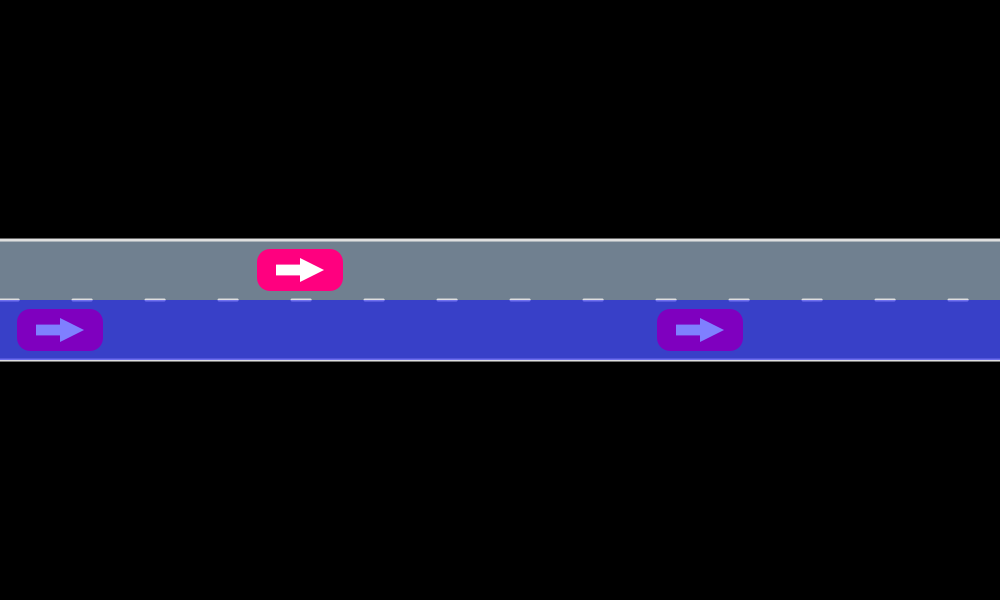

In [9]:
lane_overlay = LaneOverlay(roadway[LaneTag(1,1)], RGBA(0.0,0.0,1.0,0.5))
render(scene, roadway, [lane_overlay], cam=FitToContentCamera(0.))